In [265]:
#!pip3.6 install scipy
#!pip3.6 install matplotlib

import numpy as np
import scipy.special as sp
from scipy import integrate
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy import interpolate

# Part 1. Gaussian quadrature
The Gaussian quadrature method is one of the methods of numerical integration that allows you to increase the accuracy of integration, by using orthogonal polynomials and their roots as nodes.

$$ \int_a^b \! w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;, $$
here $\omega$ is the weight function, this weight function determines the basis of orthogonal polynomials whose roots are used as integration nodes. If the function $f(x)$ is a polynomial, then such an integration method gives exact value for the integral.

For example, let's calculate the following integral:$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  
$$

Here function is already polynomial, so we put the weight function $\omega(x) = 1$. Then the calculation of the integral reduces to the sum in the polynomials roots witch corresponding to the weight function $\omega(x) = 1$. For example, here https://dlmf.nist.gov/18.3 you may see which basis of polynomials corresponds to your weight function.

You may see, that Legendre polynomials correspond to our weight function. Now go to the documentation https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Here, the function roots_legendre immediately gives you the roots of the Legendre polynomial and weight at this roots (for Legendre polynomials all these weight are ones).

### Task 1.1
(20% of the grade)

Calculate the exact value of the integral (1) using a pen and paper (or in your mind). Remember it, then you will compare numerical results with it.

In [266]:
exact = 2/3
# Степень многочлена
n = 3


def f(x):
    res = 7*x**3-8*x**2-3*x+3
    return (res)  # array

nodes, w = sp.roots_legendre(n)
res = f(nodes)@w  # array*array

print(f"quadrature res: {round(res, 5)} \nexact res: {round(exact_solution, 5)} ")

quadrature res: 0.66667 
exact res: 0.66667 


In [267]:
### Enter your code and answer here

def mrt(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    n = 10
    prev = f(a / 2 + b / 2) * (b - a)
    while 1:
        x_coord = np.linspace(a, b, 2**n)
        step = x_coord[1] - x_coord[0]
        picks = (x_coord[1:] + x_coord[:-1]) / 2
        curr = step * np.sum(f(picks))
        if np.abs(curr - prev) < eps:
            return [curr, n]
        else:
            prev = curr
            n += 1


range_ = (-1, 1)
nodes = 2**mrt(f, *range_, 1e-10)[-1]  # array with 2 dims (mrt(f,-1,1,1e-10))
print("Nodes =", nodes)
d = integrate.quad(f, *range_, epsrel=1e-10, full_output=1)
# print(d) ‘neval’ - The number of function evaluations.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
print("The number of function evaluations =", d[2]['neval'])

Nodes = 524288
The number of function evaluations = 21


In [268]:
### Enter your code here
for i in range(1,7):  # from 1 to 6
    nodes, w = sp.roots_legendre(i)
    res = f(nodes)@w
    print(f"degree = {i}, res = {res}, exact = 2/3, diff = 10^{np.log10(np.abs(res-2/3))}")

degree = 1, res = 6.0, exact = 2/3, diff = 10^0.7269987279362623
degree = 2, res = 0.6666666666666674, exact = 2/3, diff = 10^-15.109491730176746
degree = 3, res = 0.6666666666666639, exact = 2/3, diff = 10^-14.556649761518965
degree = 4, res = 0.6666666666666667, exact = 2/3, diff = 10^-15.954589770191003
degree = 5, res = 0.6666666666666685, exact = 2/3, diff = 10^-14.724140848812729
degree = 6, res = 0.6666666666666695, exact = 2/3, diff = 10^-14.539616422220185


Здесь напишешь своё заключение.

# Task 1.2

In [269]:
def g(x):
    res = 7 * (5 * x + 5)**3 - 8 * (5 * x + 5)**2 - 3 * (5 * x + 5) + 3
    return res

for i in range(1,7):
    nodes, w = sp.roots_legendre(i)
    res = 5 * g(nodes)@w
    print(f"degree = {i}, res = {res}, exact = 44130/3, diff 10^{np.log10(np.abs(res / 5 - 2 / 3))}")

degree = 1, res = 6630.0, exact = 44130/3, diff 10^3.122325121005613
degree = 2, res = 14713.333333333336, exact = 44130/3, diff 10^3.4686426683915115
degree = 3, res = 14713.333333333332, exact = 44130/3, diff 10^3.4686426683915115
degree = 4, res = 14713.333333333336, exact = 44130/3, diff 10^3.4686426683915115
degree = 5, res = 14713.333333333332, exact = 44130/3, diff 10^3.4686426683915115
degree = 6, res = 14713.333333333334, exact = 44130/3, diff 10^3.4686426683915115


# Task 1.3

In [270]:
def f_(x):
    res = np.cos(2 * np.pi * x) / 2
    return res

sol = np.pi / 2 * sp.jv(0, 2 * np.pi)
prev = np.inf
for i in range(1, 1000):
    nodes, w = sp.roots_chebyt(i)
    res = f_(nodes)@w
    curr = np.log10(np.abs(res - sol))
    if curr == -np.inf:
        print(f'Too small, divide by zero. Stopped on degree = {i}')
        break
    print(f"degree = {i}, res = {res}, exact = {sol}, diff 10^{np.log10(np.abs(res - sol))}")
    prev = curr

print("На 18 шаге разница составляет порядок машинного эпсилона. Можно уже оставновить на 16 шаге.")

degree = 1, res = 1.5707963267948966, exact = 0.34601015881226427, diff 10^0.0880602730504781
degree = 2, res = -0.4182329132681745, exact = 0.34601015881226427, diff 10^-0.11676848949539503
degree = 3, res = 1.2211694475711936, exact = 0.34601015881226427, diff 10^-0.057912893339920675
degree = 4, res = 0.11575359323141321, exact = 0.34601015881226427, diff 10^-0.6377879773965593
degree = 5, res = 0.37786106634872507, exact = 0.34601015881226427, diff 10^-1.4968781886830465
degree = 6, res = 0.34323498164389277, exact = 0.34601015881226427, diff 10^-2.5567092861304888
degree = 7, res = 0.34617799427660145, exact = 0.34601015881226427, diff 10^-3.775116265565846
degree = 8, res = 0.3460026676271414, exact = 0.34601015881226427, diff 10^-5.125449470469351
degree = 9, res = 0.34601041637332886, exact = 0.34601015881226427, diff 10^-6.589119788489896
degree = 10, res = 0.3460101517706765, exact = 0.34601015881226427, diff 10^-8.152329403855179
degree = 11, res = 0.3460101589691607, exact 

e:\python\3.6\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


# Task 2.1

In [271]:
### Enter your code here
def pairs(n):
    k = np.ones((n,n)) / 2
    nodes, w = sp.roots_sh_legendre(n)
    f = solve(w * k - np.eye(n), -np.sin(np.pi * nodes))
    return nodes, f

def y(x):
    return np.sin(np.pi*x)+2/np.pi


def get_iter():
    dif_prev = np.inf
    for i in range(1,1000):
        nodes, f = pairs(i)
        dif = np.log10(np.linalg.norm(y(nodes) - f))
        # Остановка в случае ухудшения результата
        if dif_prev < dif:
            print(f'best iter - {i - 1}')
            return i - 1
        print(f"degree = {i}, diff norm = 10^{dif}".format(i, dif))
        dif_prev = dif

nodes_res, f_res = pairs(get_iter())

degree = 1, diff norm = 10^-0.43963870736301686
degree = 2, diff norm = 10^-1.5392322838531742
degree = 3, diff norm = 10^-3.1159140124459443
degree = 4, diff norm = 10^-4.998245712585355
degree = 5, diff norm = 10^-7.1051505019599865
degree = 6, diff norm = 10^-9.389798568348866
degree = 7, diff norm = 10^-11.822032238046832
degree = 8, diff norm = 10^-14.51734886134127
degree = 9, diff norm = 10^-15.32695351763935
best iter - 9


# Task 2.2

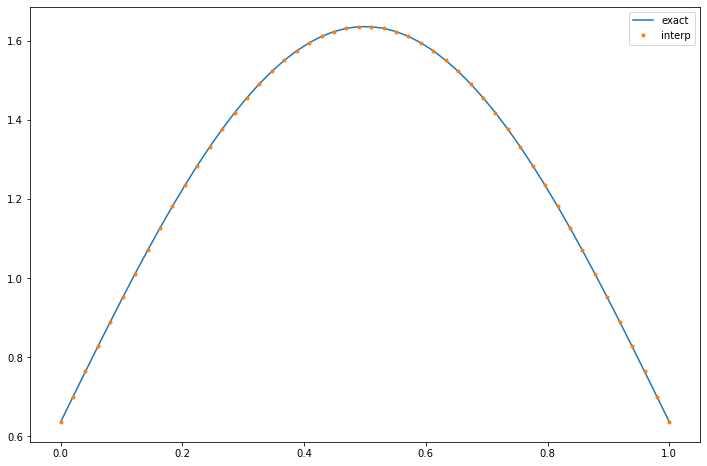

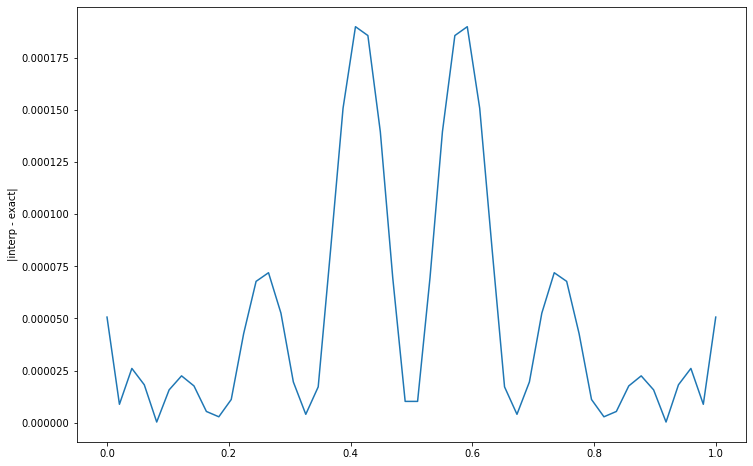

In [272]:
### Enter your code here

interp = interpolate.splrep(dots_res, f_res, s=0)
func = interpolate.splev(grid, interp, der=0)
grid = np.linspace(0, 1, 50)

plt.subplots(figsize =(12, 8))

plt.plot(grid, y(grid), grid, func, ".")
plt.legend(["exact", "interp"])
plt.show()

plt.subplots(figsize =(12, 8))

plt.plot(grid, np.abs(y(grid) - func))
plt.ylabel("|interp - exact|")
plt.show()

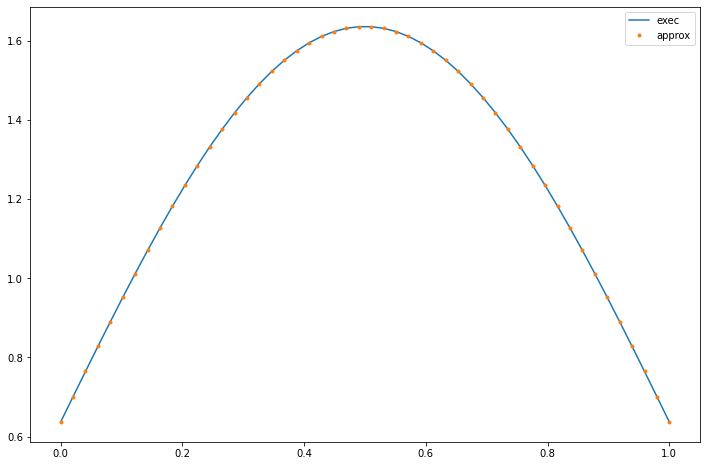

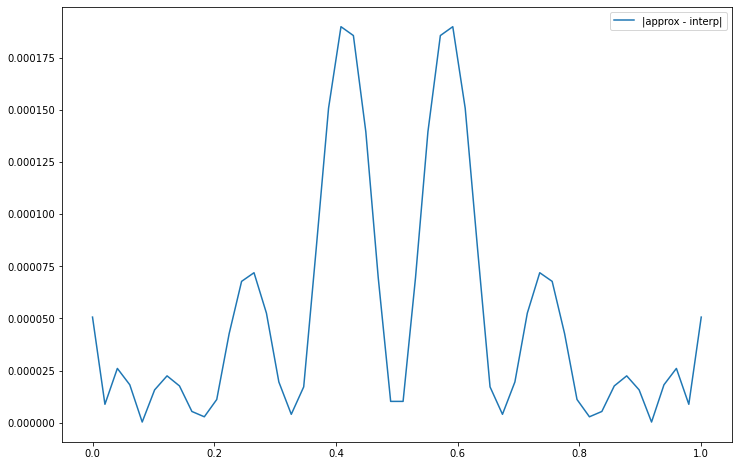

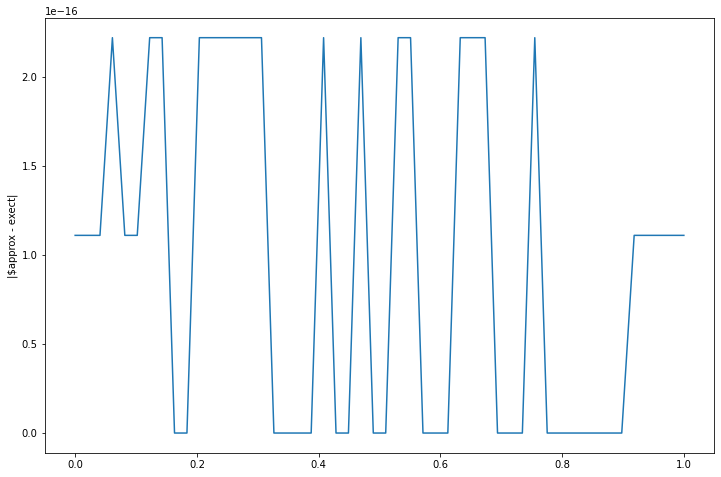

'Погрешность интерполяции велика и составляет порядка 1e-4. \nНо при обратной подставновке погрешность порядка машинного эпсилона'

In [273]:
### Enter your code here
def _f(x, f_approx):
    n = f_approx.shape[0]
    nodes, w = sp.roots_sh_legendre(n)
    res = np.sin(np.pi * x) + ((w / 2)@f_approx)
    return res

plt.subplots(figsize =(12, 8))
plt.plot(grid, y(grid), grid, _f(grid, f_res), ".", label="approx")
plt.legend(["exec", "approx"])
plt.show()


plt.subplots(figsize =(12, 8))
plt.plot(grid, np.abs(func - _f(grid, f_res)))
plt.legend(["|approx - interp|"])
plt.show()

plt.subplots(figsize =(12, 8))
plt.plot(grid, np.abs(y(grid) - _f(grid, f_res)))
plt.ylabel("|$approx - exect|")
plt.show()

"""Погрешность интерполяции велика и составляет порядка 1e-4. 
Но при обратной подставновке погрешность порядка машинного эпсилона"""